<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/iris_kmeans_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load iris data 


In [1]:
import seaborn as sns

iris = sns.load_dataset("iris")

iris is a pandas dataframe with 4 features and the species label (5 columns)

In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Creat a dataframe X with only the features to use it with the k-means algorithm:

In [4]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features

In [5]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

## K-means clustering

Apply a K-means clustering k= 3 to the dataframe with the features

In [8]:
from sklearn.cluster import KMeans

group = KMeans(n_clusters=3).fit_predict(X)


In [9]:
group

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Create a new dataframe W with the four features and the k-means grouping variable

In [10]:
W = X # create a new dataframe with the four features
W['kmeans_group'] = group #add a new column named 'kmeans_group' in the new dataframe

In [11]:
W.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'kmeans_group'],
      dtype='object')

## Plot the two scatterplots in a 1x2 panel 

both scatterplots represent petal_width vs sepal_length, left panel groups according to 'species' and right panel groups according to 'kmeans_group'

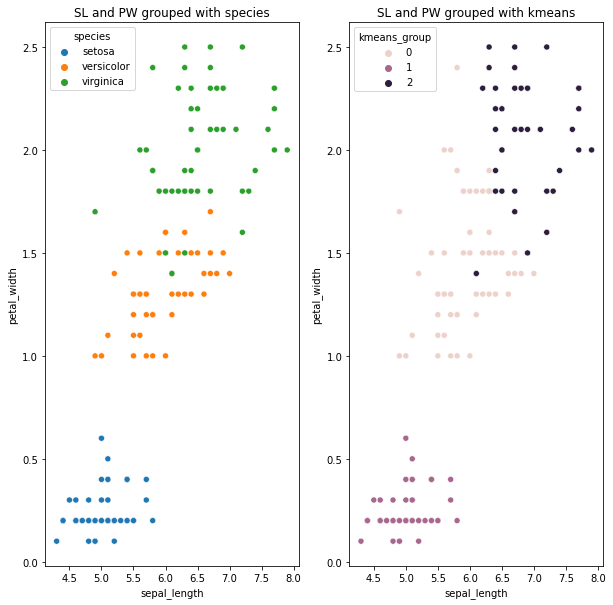

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax = sns.scatterplot(x='sepal_length', y='petal_width', hue='species',data=iris) #left panel
ax.set_title('SL and PW grouped with species')
ax1 = fig.add_subplot(122)
ax1 = sns.scatterplot(x='sepal_length', y='petal_width', hue = 'kmeans_group' ,data=W) #right panel
ax1.set_title('SL and PW grouped with kmeans')
plt.show()